Regla de aprendizaje del perceptrón
===

* *60 min* | Última modificación: Marzo 20, 2020

## Definición del problema

Se desea determinar a que clase (de tres posibles) pertence una muestra a partir de sus atributos  $x_1$ = 2.5 y $x_2$ = -4.0. Se usa una muestra artificial de 150 ejemplos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS, 
    n_features=2,
    centers=3,
    cluster_std=0.8, 
    shuffle=False,  
    random_state=12345)

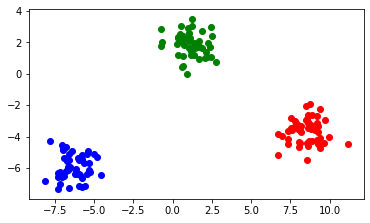

In [3]:
plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

## Definición del problema de clasificación

El problema de clasificación binaria (con clases $C_1$ y $C_2$ dicotómicas) se define de la siguiente manera:


* Cada patrón de entrada tiene la forma $\mathbf{x}=[+1,x_1,x_2,…,x_n ]$.


* Los parámetros del perceptrón binario son $\mathbf{w}=[w_0,w_1,…,w_n]$ tal que $y=\varphi(\mathbf{w}^T \mathbf{x})$, donde $\varphi(.)$ es un conmutador bipolar.

![assets/PerceptronBipolar,jpg](assets/PerceptronBipolar.jpg)

* Se desea encontrar el vector $\mathbf{w}$ tal que el perceptrón clasifique correctamente todos los patrones de entrenamiento.


* El error del perceptrón con parámetros $\mathbf{w}$, $E(\mathbf{w})$, es la cantidad de patrones mal clasificados.


![assets/PerceptronBipClasificacion-01.png](assets/PerceptronBipClasificacion-01.png)

## Regla de aprendizaje del perceptrón

La regla de aprendizaje del perceptrón es básicamente el algoritmo de gradiente descendente estocástico (SGD):

* $d_k$ es la respuesta deseada para el patrón $\mathbf{x}_k$ presentado en el instante $k$.


* $e_k$ es el error definido como:

$$
e_k= 
d_k-y_k = 
d_k - \varphi(\mathbf{w}^T_k \mathbf{x}_k) =
\begin{cases}      
       0,  & \text{Si $d_k = y_k$}\\
      +2, & \text{Si $d_k = +1$ y $y_k = -1$}\\
      -2, & \text{Si $d_k = -1$ y $y_k = +1$}\\
\end{cases}
$$


* Se desea calcular unos pesos corregidos $\mathbf{w}_{k+1}=\mathbf{w}_k+\Delta \mathbf{w}_k$ tal que el perceptrón no se equivoque; es decir:

$$
\varphi (\mathbf{w}^T_{k+1} \mathbf{x}_k) = \varphi ([\mathbf{w}_k + \Delta \mathbf{w}_k]^T  \mathbf{x}_k)=d_k
$$


El cálculo de los pesos se realiza de la siguiente forma. Se requiere que:


* 	Si $e_k=+2$, entonces $d_k=+1$,   $y_k=-1$   y   $\Delta \mathbf{w}^T_k  \mathbf{x}_k>0$ tal que:  $\varphi (\mathbf{w}^T_{k+1} \mathbf{x}_k)=+1$.


* Si $e_k=-2$, entonces $d_k=-1$, $y_k =+1$  y  $\Delta \mathbf{w}^T_k \mathbf{x}_k<0$ tal que: $\varphi (\mathbf{w}^T_ {k+1} \mathbf{x}_k)=-1$.


Entonces se podría escoger:

$$\Delta \mathbf{w}_k= \eta e_k  \mathbf{x}_k$$

$$\mathbf{w}_{k+1} = \mathbf{w}_k+\eta e_k  \mathbf{x}_k$$

donde $\eta$ es la tasa de aprendizaje. Note que la ecuación presentada es similar a la usada para el ADALINE, pero en el caso del perceptrón, $e_k \in \{-2, 0, +2\}$, tal que la convergencia genera fronteras de decisión que usualmente son muy diferentes a las del ADALINE.  

Se inicializa el vector de parámetros $\mathbf{w}_0 = [w_0,w_1,…,w_n ]^T$ con ceros, o con un valor aleatorio pequeño.

Los patrones deberían presentarse en un orden aleatorio. 



El siguiente esquema permite diferenciar entre los algoritmos de aprendizaje del perceptrón y el ADALINE.

![assets/PerceptronBipClasificacion-04.png](assets/PerceptronBipClasificacion-04.png)

## Implementación del algoritmo

In [4]:
class BipolarPerceptronClassifier:
    """
    Bipolar perceptron classifier
    
    Parameters
    ----------
    learning_rate : float
        Learning rate coefficient. Default to 0.1. 
        
    max_iter : integer
        The maximun number of passes over the training data (aka epochs).
        Default to 100    
    """
    
    def __init__(self, learning_rate=0.00001, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None
        
    def fit(self, X, y):
        
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if not isinstance(y, np.ndarray):
            d = np.array(y)
        else:
            d = y.copy()
        
        self.w = np.zeros(1 + len(X[0]))
        X = np.c_[np.ones(len(d)), X]
        history = []
        for iter in range(self.max_iter):
            n = np.random.choice(len(d), 1)
            p = np.dot(X[n,:], self.w)
            p = +1.0 if p >= 0.0 else -1.0
            e = (d[n] - p)[0]
            self.w += 2 * self.learning_rate * e * X[n][0]
            history.append(e**2)
            
        return history

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        y = np.dot(X, self.w)
        return [-1 if v < 0 else +1 for v in y]

## Entrenamiento del modelo

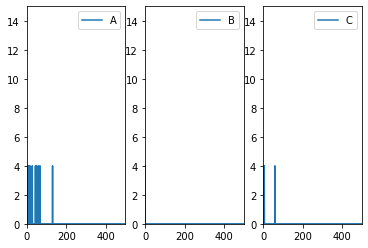

In [5]:
##
## Solución 
## Se codifica un vector para cada clase
##

A = [+1 if u == 0 else -1 for u in d]
B = [+1 if u == 1 else -1 for u in d]
C = [+1 if u == 2 else -1 for u in d]

max_iter = 500

mA = BipolarPerceptronClassifier(learning_rate=0.002, max_iter=max_iter)
mB = BipolarPerceptronClassifier(learning_rate=0.002, max_iter=max_iter)
mC = BipolarPerceptronClassifier(learning_rate=0.003, max_iter=max_iter)

historyA = mA.fit(X, A)
historyB = mB.fit(X, B)
historyC = mC.fit(X, C)

plt.subplot(1, 3, 1)
plt.plot(historyA)
plt.legend('A');
plt.xlim(0, max_iter)
plt.ylim(0, 15);

plt.subplot(1, 3, 2)
plt.plot(historyB)
plt.legend('B');
plt.xlim(0, max_iter)
plt.ylim(0, 15);

plt.subplot(1, 3, 3)
plt.plot(historyC);
plt.legend('C');
plt.xlim(0, max_iter)
plt.ylim(0, 15);

## Pronóstico

In [6]:
##
##  Pronostico para un punto que no pertence
##  a la muestra de datos
##
print(mA.predict([[-2,5, -4.0]]), 
      mB.predict([[-2,5, -4.0]]),
      mC.predict([[-2,5, -4.0]]))

## el punto pertence a la clase A

[1] [1] [-1]


## Fronteras de decisión

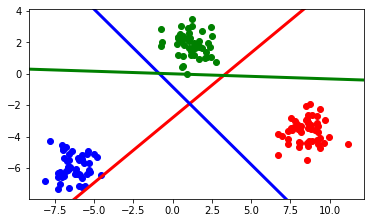

In [7]:
plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)
fronteraA = - mA.w[0] / mA.w[2] - mA.w[1] / mA.w[2] * xplot
fronteraB = - mB.w[0] / mB.w[2] - mB.w[1] / mB.w[2] * xplot
fronteraC = - mC.w[0] / mC.w[2] - mC.w[1] / mC.w[2] * xplot

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim);

### Variaciones al método del perceptrón

La primera variación al método del perceptrón consiste en calcular la corrección neta sobre todos los patrones e introducir un mecanismo de adaptación en la tasa de aprendizaje:

$$
\mathbf{w}_{k+1} = \mathbf{w}_k + \eta \sum_{p=1}^P  e_p \mathbf{x}_p
$$


La segunda variación consiste en introducir un margen $b$ al realizarse el entrenamiento del perceptrón, tal que:

$$
y_k = \varphi \left( \mathbf{w}^T_k \mathbf{x}_k-b * d_k \right)
$$

**Actividad.---** Modifique el código del ejercicio anterior para incorporar las dos variaciones indicadas simultaneamente. Para el caso de $\eta$ considere que si el error disminuye de una iteración a otra, $\eta$ aumenta; si el error aumenta, se retorna a los pesos anteriores y $\eta$ disminuye.

**Actividad.---** Grafique las fronteras de decisión para los problemas propuestos.

## Solución usando sklearn

In [8]:
from sklearn.linear_model import Perceptron

clf = Perceptron(
    penalty=None,             # None, 'l1', 'l2', 'elasticnet' 
    alpha=0.0001,             # parametro regularizacion
    fit_intercept=True,       # 
    max_iter=1000,            #
    shuffle=True,             # 
    verbose=0,                #
    eta0=1.0,                 # tasa de aprendizaje
    random_state=0,           # para shuffle
    early_stopping=False,     # ?early_stopping
    validation_fraction=0.1,  # % test set en early_stopping
    n_iter_no_change=5,       # máximo de iteraciones sin cambio
    class_weight=None,        # peso de las clases
    warm_start=False)         # ?usa la solución previa como punto de arranque

clf.fit(X, d)
clf.score(X, d)

1.0

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(
    d,
    clf.predict(X)
)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [10]:
##
## Parametros
##
clf.coef_

array([[ 3.60924129, -3.87946541],
       [-6.64344969, -3.02385523],
       [ 0.05183502, 11.07081134]])

In [11]:
##
## Interceptos
##
clf.intercept_

array([-15.,  -4.,   2.])

**Ejercicio.---** Resuelva el problema anterior usando `SGDClassifier` y la función de pérdida del preceptrón.